In [61]:
import numpy as np  
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from scipy import stats
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  
#import all required classes for market basket analysis from mlxtedn library
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline

In [3]:
#Stop showing warning messages
import warnings
warnings.simplefilter('ignore')

# Assignment 1- Classification

In [408]:
df = pd.read_csv("E:/SEM2/1.SUBJECTS/Data Mining/assign/Classification_Loan_Data.csv")

In [409]:
df.shape

(614, 13)

Train Data  - This is the data on which we will perform training of classifiers.

In [410]:
loan_train=df.head(500)
loan_train.shape


(500, 13)

<font color='blue'>Final Test Data - Below is the dataset which is unseen during training and I have performed final testing of classifiers. Moreover this dataset will act as real world data so I have neither removed outliers nor balanced it. Only missing data has been treated.</font>

In [411]:
loan_test=df.tail(114)
loan_test.shape

(114, 13)

In [412]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         500 non-null    int64  
 1   Income_of_Applicant        500 non-null    int64  
 2   Income_of_Joint_Applicant  500 non-null    float64
 3   Loan_Amount_Requirement    482 non-null    float64
 4   Loan_Amount_Term           486 non-null    float64
 5   Credit_History             459 non-null    float64
 6   Gender                     491 non-null    object 
 7   Is_Married                 497 non-null    object 
 8   No_of_Dependents           488 non-null    object 
 9   Level_of_Education         500 non-null    object 
 10  IS_Self_Employed           473 non-null    object 
 11  Area_of_Property           500 non-null    object 
 12  Loan_Status                500 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 5

In [413]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 500 to 613
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         114 non-null    int64  
 1   Income_of_Applicant        114 non-null    int64  
 2   Income_of_Joint_Applicant  114 non-null    float64
 3   Loan_Amount_Requirement    110 non-null    float64
 4   Loan_Amount_Term           114 non-null    float64
 5   Credit_History             105 non-null    float64
 6   Gender                     110 non-null    object 
 7   Is_Married                 114 non-null    object 
 8   No_of_Dependents           111 non-null    object 
 9   Level_of_Education         114 non-null    object 
 10  IS_Self_Employed           109 non-null    object 
 11  Area_of_Property           114 non-null    object 
 12  Loan_Status                114 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage:

From the above information regarding test and train datasets, we can see that there are null values. I have dealt with missing values, outliers,encoded the data, balanced and transformed the training dataset as and when needed in the following lines of code before training the classifiers.

<h1><font color='green'>Exploratory Data Analysis (EDA)</font></h1>


Finding out outliers through Z score

In [414]:
z2 = np.abs(stats.zscore(loan_train['Income_of_Joint_Applicant']))
print(z2)
threshold = 3
 # Position of the outlier
print(np.where(z2 > 3))


0      0.706425
1      0.000794
2      0.706425
3      0.399425
4      0.706425
         ...   
495    0.278248
496    0.090837
497    0.633445
498    0.706425
499    1.364581
Name: Income_of_Joint_Applicant, Length: 500, dtype: float64
(array([  9,  12, 122, 177, 402, 417, 444], dtype=int64),)


In [415]:
loan_train.drop( [9,12, 122, 177, 402, 417, 444], inplace = True)

In [416]:
z3 = np.abs(stats.zscore(loan_train['Loan_Amount_Requirement']))
print(z3)
threshold = 3
 # Position of the outlier
print(np.where(z3 > 3))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: Loan_Amount_Requirement, Length: 493, dtype: float64
(array([], dtype=int64),)


In [417]:
z4 = np.abs(stats.zscore(loan_train['Loan_Amount_Term']))
print(z4)
threshold = 3
 # Position of the outlier
print(np.where(z4 > 3))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: Loan_Amount_Term, Length: 493, dtype: float64
(array([], dtype=int64),)


In [418]:
z4 = np.abs(stats.zscore(loan_train['Credit_History']))
print(z4)
threshold = 3
 # Position of the outlier
print(np.where(z4 > 3))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: Credit_History, Length: 493, dtype: float64
(array([], dtype=int64),)


In [419]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         493 non-null    int64  
 1   Income_of_Applicant        493 non-null    int64  
 2   Income_of_Joint_Applicant  493 non-null    float64
 3   Loan_Amount_Requirement    475 non-null    float64
 4   Loan_Amount_Term           479 non-null    float64
 5   Credit_History             453 non-null    float64
 6   Gender                     484 non-null    object 
 7   Is_Married                 490 non-null    object 
 8   No_of_Dependents           481 non-null    object 
 9   Level_of_Education         493 non-null    object 
 10  IS_Self_Employed           466 non-null    object 
 11  Area_of_Property           493 non-null    object 
 12  Loan_Status                493 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 5

<font color='blue'> Dropping ID column as it is irrelevant to our classifier and prediction of Loan Status</font>

In [420]:
loan_train.drop('ID',axis=1,inplace=True)


In [421]:
loan_test.drop('ID',axis=1,inplace=True)

In [422]:
# Loan Amount Requirement 
loan_train['Loan_Amount_Requirement']=loan_train['Loan_Amount_Requirement'].fillna(loan_train['Loan_Amount_Requirement'].median())


In [423]:

loan_test['Loan_Amount_Requirement']=loan_test['Loan_Amount_Requirement'].fillna(loan_test['Loan_Amount_Requirement'].mode().iloc[0])


In [424]:
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode().iloc[0])

In [425]:
loan_test['Loan_Amount_Term']=loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode().iloc[0])

In [426]:
loan_train['Credit_History']=loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode().iloc[0])

In [427]:
loan_test['Credit_History']=loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode().iloc[0])

In [428]:
loan_train['Gender'].fillna("Other", inplace = True)

In [429]:
loan_train['Gender'].value_counts()

Male      394
Female     90
Other       9
Name: Gender, dtype: int64

<h4><font color = 'blue'> Encoding the categorical variable i.e textual data that can be counted using value counts and can be of
any type like Nominal, Ordinal and Continuous. I encoded categorical variables to feed them to the classifier. Encoding can be
done using any of the following methods:
    <ol>
        <li>Replacing values</li>
        <li>Encoding labels</li>
        <li>One-Hot encoding</li>
        <li>Binary encoding</li>
        <li>Backward difference encoding</li>
        <li>Miscellaneous features</li>
    </ol>
    
    
   Replacing Encoding Methods have been used for encoding
</font></h4>

In [430]:
loan_train['Gender'].replace(['Male','Female','Other'],[0, 1,2], inplace=True)

In [431]:
loan_test['Gender'].fillna("Other", inplace = True)
loan_test['Gender'].value_counts()
loan_test['Gender'].replace(['Male','Female','Other'],[0, 1,2], inplace=True)

In [432]:
loan_train['Is_Married'].fillna("Marital_Status_Unspecified", inplace = True)

In [433]:
loan_train['Is_Married'].value_counts()

Yes                           317
No                            173
Marital_Status_Unspecified      3
Name: Is_Married, dtype: int64

In [434]:
loan_train['Is_Married'].replace(['Yes','No','Marital_Status_Unspecified'],[0, 1,2], inplace=True)

In [435]:
loan_test['Is_Married'].fillna("Marital_Status_Unspecified", inplace = True)
loan_test['Is_Married'].value_counts()
loan_test['Is_Married'].replace(['Yes','No','Marital_Status_Unspecified'],[0, 1,2], inplace=True)

In [436]:
loan_train['No_of_Dependents']=loan_train['No_of_Dependents'].fillna(loan_train['No_of_Dependents'].mode().iloc[0])


In [437]:
loan_train['No_of_Dependents'].value_counts()

0     297
1      80
2      77
3+     39
Name: No_of_Dependents, dtype: int64

In [438]:
loan_train['No_of_Dependents'].replace(['0','1','2','3+'],[0, 1,2,3], inplace=True)

<font color= 'blue'> I could have used one hot encoding method using the code 
    <i>one_hot = pd.get_dummies(loan_train['No_of_Dependents'])</i>
To avoid creating 4 more new columns I have encoded using replacing method to keep it simple. Here 3+ has been encoded as 3</font>

In [439]:
loan_test['No_of_Dependents']=loan_test['No_of_Dependents'].fillna(loan_test['No_of_Dependents'].mode().iloc[0])
loan_test['No_of_Dependents'].value_counts()
loan_test['No_of_Dependents'].replace(['0','1','2','3+'],[0, 1,2,3], inplace=True)

In [440]:
loan_train['Level_of_Education'].value_counts()

Graduate        386
Not Graduate    107
Name: Level_of_Education, dtype: int64

In [441]:
loan_train['Level_of_Education'].replace(['Not Graduate','Graduate'],[0, 1], inplace=True)

In [442]:
loan_test['Level_of_Education'].value_counts()
loan_test['Level_of_Education'].replace(['Not Graduate','Graduate'],[0, 1], inplace=True)

In [443]:
loan_train['IS_Self_Employed']=loan_train['IS_Self_Employed'].fillna(loan_train['IS_Self_Employed'].mode().iloc[0])

In [444]:
loan_train['IS_Self_Employed'].value_counts()

No     428
Yes     65
Name: IS_Self_Employed, dtype: int64

In [445]:
loan_train['IS_Self_Employed'].replace(['No','Yes'],[0, 1], inplace=True)

In [446]:
loan_test['IS_Self_Employed']=loan_test['IS_Self_Employed'].fillna(loan_test['IS_Self_Employed'].mode().iloc[0])
loan_test['IS_Self_Employed'].value_counts()
loan_test['IS_Self_Employed'].replace(['No','Yes'],[0, 1], inplace=True)

In [447]:
loan_train['Area_of_Property'].value_counts()


Semiurban    184
Urban        169
Rural        140
Name: Area_of_Property, dtype: int64

In [448]:
loan_train['Area_of_Property'].replace(['Semiurban','Urban','Rural'],[0, 1,2], inplace=True)


In [449]:
loan_test['Area_of_Property'].value_counts()
loan_test['Area_of_Property'].replace(['Semiurban','Urban','Rural'],[0, 1,2], inplace=True)

In [450]:
loan_train['Loan_Status'].replace(['Y','N'],[1,0], inplace=True)

In [451]:
loan_train['Loan_Status'].value_counts()

1    341
0    152
Name: Loan_Status, dtype: int64

In [452]:
loan_test['Loan_Status'].replace(['Y','N'],[1,0], inplace=True)
loan_test['Loan_Status'].value_counts()

1    77
0    37
Name: Loan_Status, dtype: int64

In [453]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income_of_Applicant        493 non-null    int64  
 1   Income_of_Joint_Applicant  493 non-null    float64
 2   Loan_Amount_Requirement    493 non-null    float64
 3   Loan_Amount_Term           493 non-null    float64
 4   Credit_History             493 non-null    float64
 5   Gender                     493 non-null    int64  
 6   Is_Married                 493 non-null    int64  
 7   No_of_Dependents           493 non-null    int64  
 8   Level_of_Education         493 non-null    int64  
 9   IS_Self_Employed           493 non-null    int64  
 10  Area_of_Property           493 non-null    int64  
 11  Loan_Status                493 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 50.1 KB


In [454]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 500 to 613
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income_of_Applicant        114 non-null    int64  
 1   Income_of_Joint_Applicant  114 non-null    float64
 2   Loan_Amount_Requirement    114 non-null    float64
 3   Loan_Amount_Term           114 non-null    float64
 4   Credit_History             114 non-null    float64
 5   Gender                     114 non-null    int64  
 6   Is_Married                 114 non-null    int64  
 7   No_of_Dependents           114 non-null    int64  
 8   Level_of_Education         114 non-null    int64  
 9   IS_Self_Employed           114 non-null    int64  
 10  Area_of_Property           114 non-null    int64  
 11  Loan_Status                114 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 10.8 KB


In [455]:
loan_train.head()

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property,Loan_Status
0,5849,0.0,126.0,360.0,1.0,0,1,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,2,0
2,3000,0.0,66.0,360.0,1.0,0,0,0,1,1,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,1,0,1,0,1,1


In [456]:
target_count=loan_train.Loan_Status.value_counts()
target_count

1    341
0    152
Name: Loan_Status, dtype: int64

<font color ='blue'> Handling the Imbalanced Dataset. Our target is to find Loan Status. If we feed skewed data to the classifier then it will learn in a biased way. Models will detect Loan Status=1 way better than it can detect Loan Status=0.
Here I have used oversampling method to balance my train dataset since the imbalance ratio is more than near about 1 </font>

In [457]:
341/152 #Imbalance ratio

2.2434210526315788

In [458]:
class_0 = loan_train[loan_train['Loan_Status'] == 0]
class_1 = loan_train[loan_train['Loan_Status'] == 1]

In [459]:
class_0_over = class_0.sample(target_count[1], replace=True)

In [460]:
class_0_over.shape

(341, 12)

In [461]:
newdata=pd.concat([class_0_over, class_1], axis=0)

In [462]:
newdata.shape

(682, 12)

In [463]:
newdata.Loan_Status.unique()

array([0, 1], dtype=int64)

In [464]:
newdata.Loan_Status.value_counts()

0    341
1    341
Name: Loan_Status, dtype: int64

In [465]:
loan_train=newdata

<font color='blue'>I have extracted the feature variables for classification. Next I have used train test split on my training dataset.</font>

In [466]:
Feature = loan_train[['Income_of_Applicant','Income_of_Joint_Applicant','Loan_Amount_Requirement','Loan_Amount_Term','Credit_History','Gender','Is_Married','Level_of_Education','No_of_Dependents','IS_Self_Employed','Area_of_Property']]
#Feature = pd.concat([Feature,pd.get_dummies(loan_train['No_of_Dependents'])], axis=1)
Feature.head(6)

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,Level_of_Education,No_of_Dependents,IS_Self_Employed,Area_of_Property
112,3572,4114.0,152.0,360.0,0.0,0,0,0,0,0,2
307,2400,1863.0,104.0,360.0,0.0,1,1,1,0,0,1
459,8334,0.0,160.0,360.0,1.0,0,0,1,0,0,0
24,3717,2925.0,151.0,360.0,1.0,0,0,1,1,0,0
180,6400,7250.0,180.0,360.0,0.0,0,0,1,1,0,1
341,2378,0.0,46.0,360.0,1.0,1,1,1,0,0,2


<font color ='blue'>Separating Target variable.Applying scaling to standardize mean and variance of our feature dataset. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.</font>

In [467]:
y=loan_train[['Loan_Status']]
X=Feature
X= preprocessing.StandardScaler().fit(X).transform(X)


<font color ='blue'>train_test_split selects randomly the train and test size based on the ratio given by <i>np.random</i>. If we define random state using any number then every single time I run this function I will have a deterministic train-test split whose distribution is same for every run.</font>

In [468]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)

In [469]:
y_test.value_counts()

Loan_Status
1              70
0              67
dtype: int64

<font color ='blue'>KNN is a non parametric, lazy learner supervised machine learning algorithm. It stores dataset during training and classifies the test data accordingly when it get it. Here I have applied feature scaling on X_train and X_test datasets before feeding to the KNN Classifier.</font>

In [470]:
#feature Scaling to compute confusion matrix by applying KNN Classifier
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  


In [471]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [472]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

<font color ='blue'>Predicting based on y_test. We have a binary classification problem at hand i.e to find the Loan Status, hence a 2x2 Matrix suffices our criteria. Lets decipher the meaning of each cell of the matrix.</font>
    
<font color ='blue'>True Positive (TP)
.The predicted value matches the actual value
.The actual value was positive and the model predicted a positive value</font>

<font color ='blue'>True Negative (TN) 
.The predicted value matches the actual value
.The actual value was negative and the model predicted a negative value</font>
    
<font color ='blue'>False Positive (FP) – Type 1 error
.The predicted value was falsely predicted
.The actual value was negative but the model predicted a positive value
.Also known as the Type 1 error</font>
    
<font color ='blue'>False Negative (FN) – Type 2 error
.The predicted value was falsely predicted
.The actual value was positive but the model predicted a negative value
.Also known as the Type 2 error </font>

In [473]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

True Positive cases= 51
True Negative cases= 52
False Positive cases= 15
False Negative cases= 19
Total positive cases= 70
Total negative cases= 67


In [474]:
# Matrix Form
cm

array([[52, 15],
       [19, 51]], dtype=int64)

<font color ='blue'> I balanced the dataset but I again subjected my dataset through train_test_split. Here the dataset gets imbalanced.I have shown before the imbalance ratio is not critical 70/67 is near about 1. Hence accuracy score is not too bad and doesnot pose as accuracy paradox in this case.<li>Accuracy found through confusion matrix and model data</li><li>Sensitivity is also called as Recall or True Positive Rate. Recall tells us how many of the actual positive cases we were able to predict correctly with our model.</li><li>Specificity measures that out of total number of negative predictions how many are correctly predicted as negative.</li><li>False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive.</li><li>False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative.</li><li>Precision tells us how many of the correctly predicted cases actually turned out to be positive.This measures reliability of our model.</li><li>Weighted TPR-TNR measure is a suitable single valued measure to assess overall performance of the classifiers when dataset is imbalanced. This is a stable measure and an all weather friend that has been tested as per the referenced research paper in the reference section</li></font>



In [477]:
print("Measures using KNN")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy)
print("accuracy=",accuracy_score(y_test, y_pred))
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)
precision=TP/(TP+FP)
print("precision=", precision)
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Measures using KNN
accuracy= 0.7518248175182481
accuracy= 0.7518248175182481
sensitivity= 0.7285714285714285
specificity= 0.7761194029850746
FPR= 0.22388059701492538
FNR= 0.2714285714285714
0.27142857142857146
precision= 0.7727272727272727
Weighted_TPR_TNR= 0.752866014038255


<font color='blue'>Above I set the hyperparameter k neighbors =5. For exploratory purpose, now I am making it run through a loop to find the value of k which gives the best accuracy. Finally I plot it using matplotlib. The curve reaches highest accuracy at k=1 or nearest neighbor algorithm.</font>

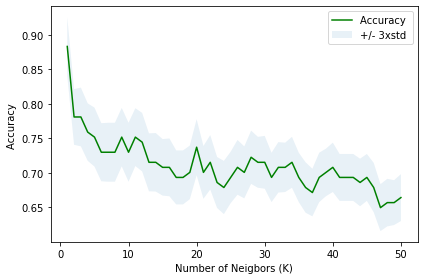

In [478]:
#y_pred=y_pred.reshape(101,1)
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred)/np.sqrt(y_pred.shape[0])
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neigbors (K)')
plt.tight_layout()
plt.show()
 
    



In [481]:
print( "The best accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy is 0.8832116788321168 with k= 1


<font color ='blue'>A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.</font>

In [482]:
from sklearn.tree import DecisionTreeClassifier

<font color ='blue'>Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. Entropy is the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N(). </font>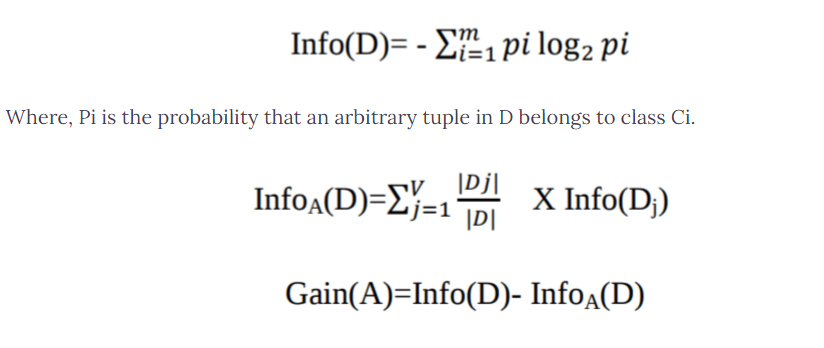

In [483]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [484]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

0.7372262773722628

Text(0.5, 257.44, 'Predicted label')

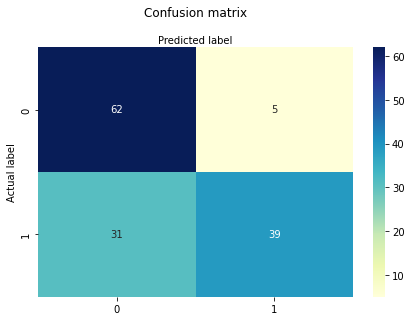

In [485]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [486]:
print("Following Measures using Decision Tree Classifier:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test, y_pred))
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Following Measures using Decision Tree Classifier:
Accuracy: 0.7372262773722628
Precision: 0.8863636363636364
Sensitivity/Recall: 0.5571428571428572
specificity= 0.9253731343283582
FPR= 0.07462686567164178
FNR= 0.44285714285714284
Weighted_TPR_TNR= 0.8291270446516117


In [487]:
y.Loan_Status.unique()

array([0, 1], dtype=int64)

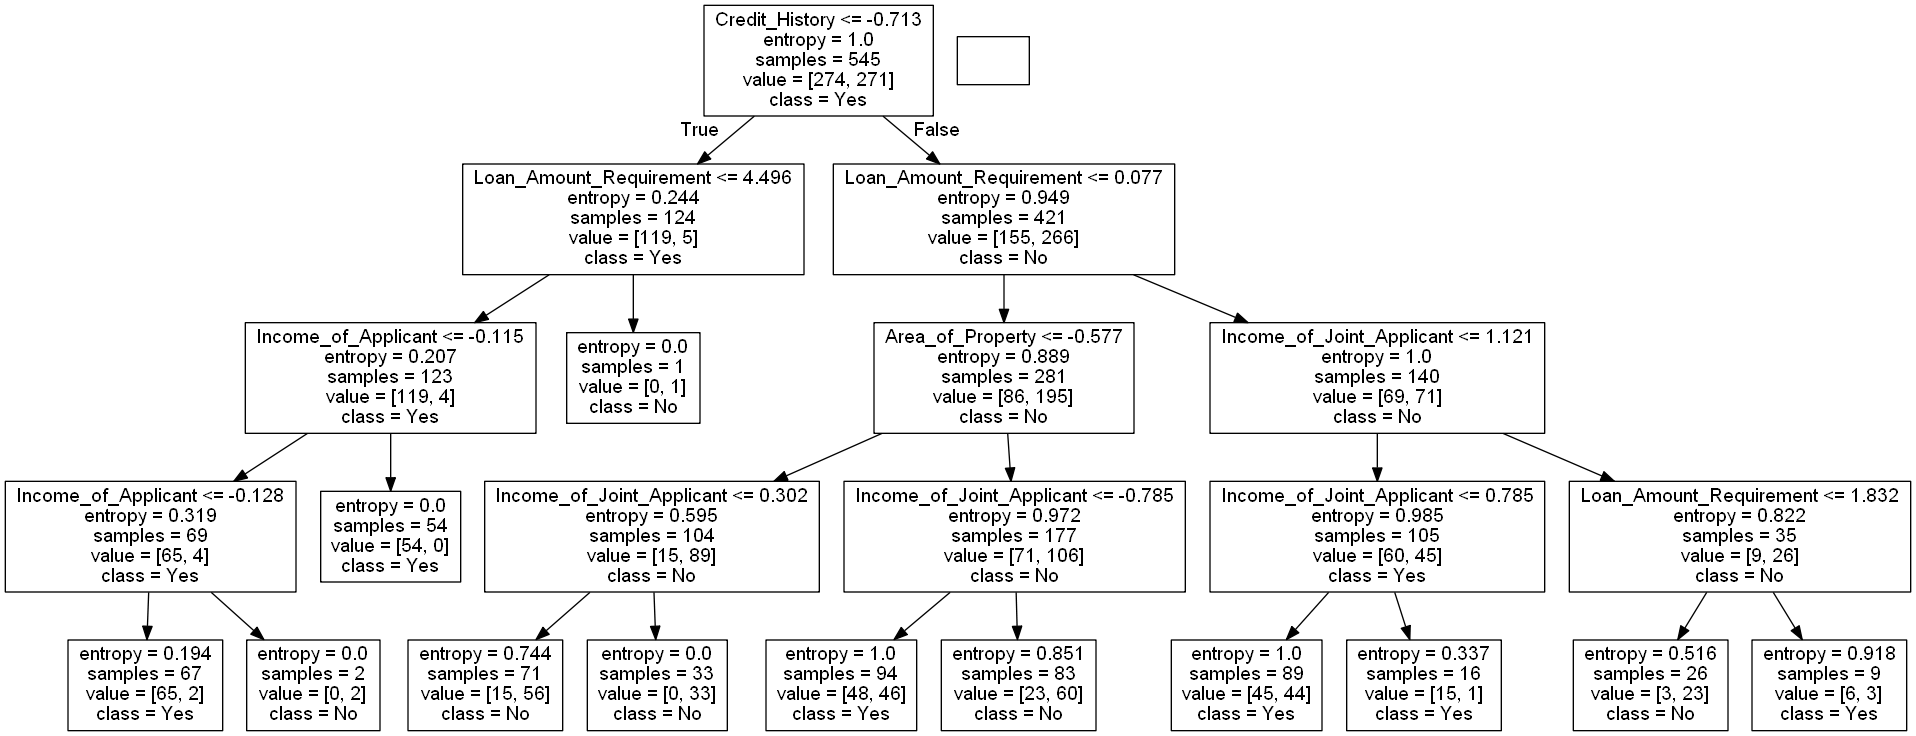

In [488]:
dot_data = tree.export_graphviz(dtmodel, out_file=None, 
                                feature_names=['Income_of_Applicant','Income_of_Joint_Applicant','Loan_Amount_Requirement','Loan_Amount_Term','Credit_History','Gender','Is_Married','Level_of_Education','No_of_Dependents','IS_Self_Employed','Area_of_Property'],  
                                class_names=['Yes','No'])
#y.Loan_Status.unique())
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

<font color='blue'>
    

SVM uses a technique called the kernel trick. The Kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Thus converting nonseparable problem to separable problems by adding more dimension to it. I have used a simple Linear Kernel. A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.</font>

In [489]:
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

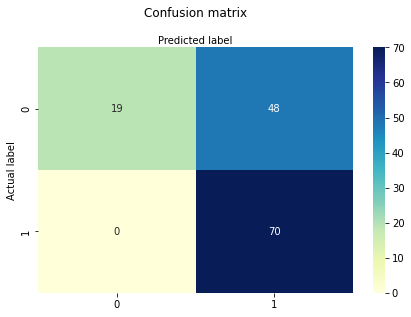

In [490]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [491]:
print("Measures for SVM Classifier")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy using confusion matrix=",accuracy)
print("accuracy=",accuracy_score(y_test, y_pred))
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)
precision=TP/(TP+FP)
print("precision=", precision)
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Measures for SVM Classifier
accuracy using confusion matrix= 0.6496350364963503
accuracy= 0.6496350364963503
sensitivity= 1.0
specificity= 0.2835820895522388
FPR= 0.7164179104477612
FNR= 0.0
0.0
precision= 0.5932203389830508
Weighted_TPR_TNR= 0.6339470530558885


<font color='blue'>Model Evaluation using Logistic Regression. Binary Logistic Regression, a special case of linear regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature.</font>


In [495]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yprediction=logreg.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

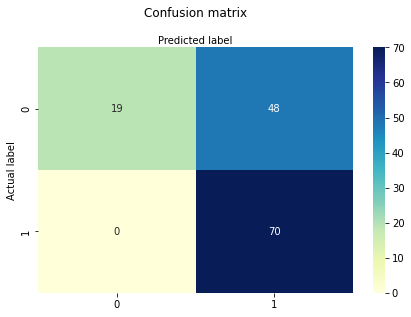

In [496]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [497]:
print("Following Measures using Logistic Regression:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test, y_pred))
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
print("FNR=", 1-metrics.recall_score(y_test, y_pred))
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Following Measures using Logistic Regression:
Accuracy: 0.6496350364963503
Precision: 0.5932203389830508
Sensitivity/Recall: 1.0
specificity= 0.2835820895522388
FPR= 0.7164179104477612
FNR= 0.0
Weighted_TPR_TNR= 0.6339470530558885


<font color='blue'>Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.AUC score for the case is 0.801. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.</font>

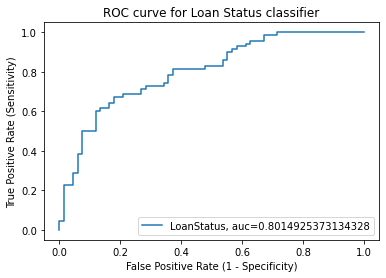

In [499]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="LoanStatus, auc="+str(auc))
plt.title('ROC curve for Loan Status classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc=4)
plt.show()

<font color ='blue'>Naive Bayes is a statistical classification technique based on Bayes Theorem. It is a supervised learning algorithm.Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. It works fast using large datasets.
</font>

In [500]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


Text(0.5, 257.44, 'Predicted label')

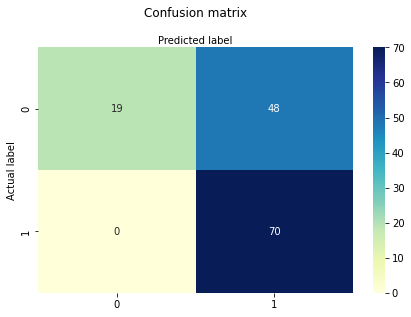

In [501]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [375]:
print("Following Measures using Naive Bayes Classifier:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test, y_pred))
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
print("FNR=", 1-metrics.recall_score(y_test, y_pred))
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Following Measures using Naive Bayes Classifier:
Accuracy: 0.7737226277372263
Precision: 0.693069306930693
Sensitivity/Recall: 1.0
specificity= 0.5373134328358209
FPR= 0.4626865671641791
FNR= 0.0
Weighted_TPR_TNR= 0.6657805861204925


<font color='blue'>Random forest classifier is an ensemble method of classification.It creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. I have shown the accuracy that includes all features but not shown all measures for all features. I have found out the importance score of each feature variable and have found the accuracy and measures based on only the selected features having comparable higher scores.</font>

In [377]:
#Creating a RandomForest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [378]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9343065693430657


In [379]:
feature_imp = pd.Series(clf.feature_importances_,index=['Income_of_Applicant','Income_of_Joint_Applicant','Loan_Amount_Requirement','Loan_Amount_Term','Credit_History','Gender','Is_Married','Level_of_Education','No_of_Dependents','IS_Self_Employed','Area_of_Property']).sort_values(ascending=False)
feature_imp

Loan_Amount_Requirement      0.216804
Income_of_Applicant          0.208147
Credit_History               0.189411
Income_of_Joint_Applicant    0.107144
Area_of_Property             0.073288
No_of_Dependents             0.058753
Loan_Amount_Term             0.044004
Is_Married                   0.027902
Gender                       0.025937
IS_Self_Employed             0.024366
Level_of_Education           0.024243
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


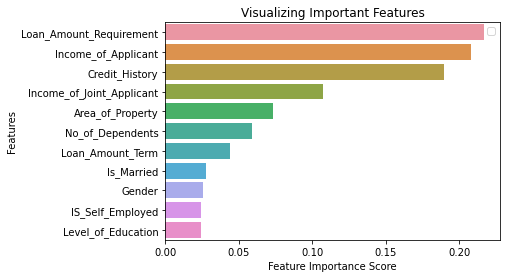

In [380]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [382]:
# Split dataset into features and labels
X=loan_test[['Loan_Amount_Requirement','Income_of_Applicant','Credit_History']] #Removed other features with lesser score of importance
y=loan_test['Loan_Status']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=3) # 70% training and 30% test

In [383]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.775


Text(0.5, 257.44, 'Predicted label')

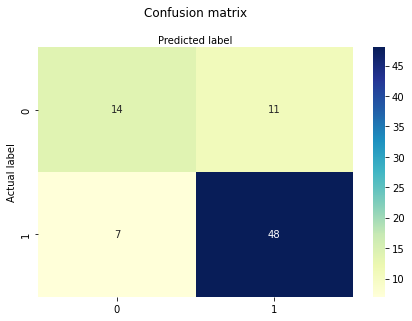

In [384]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [385]:
print("Following Measures are using Random Forest Classifier:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test, y_pred))
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)
print("FNR=", 1-metrics.recall_score(y_test, y_pred))
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=",Weighted_TPR_TNR)

Following Measures are using Random Forest Classifier:
Accuracy: 0.775
Precision: 0.8135593220338984
Sensitivity/Recall: 0.8727272727272727
specificity= 0.208955223880597
FPR= 0.16417910447761194
FNR= 0.12727272727272732
Weighted_TPR_TNR= 0.8528358208955225


				
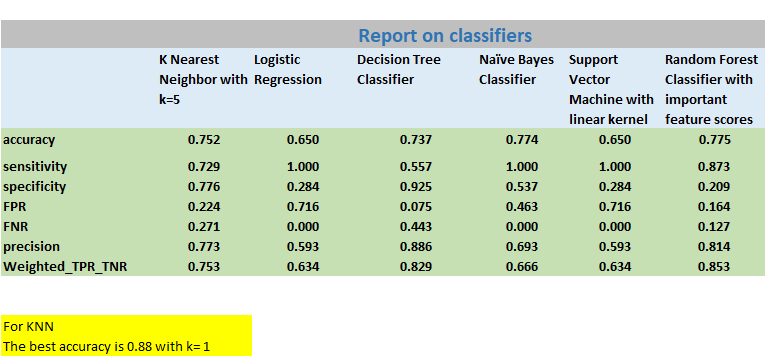


# Assignment 2 : Clustering


In [4]:
df1 = pd.read_csv("E:/SEM2/1.SUBJECTS/Data Mining/assign/Clustering_cardata.csv")

In [53]:
df2 = pd.read_csv("E:/SEM2/1.SUBJECTS/Data Mining/assign/Clustering_cardata_description.csv")


In [54]:
df2=df2.drop('Unnamed: 0',axis=1)


In [55]:
df2=df2.drop('Unnamed: 1',axis=1)

In [59]:
pd.set_option('display.max_colwidth', -1) 

In [60]:
df2

,Respondent Id,Unnamed: 3,
0,Indian Technlogy high order,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
1,Buy Made in India,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
2,Value for money,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
3,Convenience over style,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
4,Don't do waste full expenditure,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
5,No compromise on safety,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
6,Saver not spender,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
7,Try new things,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
8,Be part of a changing world,=,"1 = Strongly disagree, 2 = disagree, 3 = neutral, 4 = agree, 5 = Strongly agree"
9,Purchase Intentions,=,"1 = Yes, 0 = No"


<font color='blue'>The above table is the description of codes used in our dataset.</font>

In [6]:
df1.shape

(25, 18)

In [7]:
df1.isnull().sum()

Resp.Id                            0
Indian Technlogy high order        0
Buy Made in India                  0
Value for money                    0
Convenience over style             0
Don't do waste full expenditure    0
No compromise on safety            0
Saver not spender                  0
Try new things                     0
Be part of a changing world        0
Purchase Intentions                0
Occupation                         0
Family income                      0
Family size                        0
Marital Status                     0
Education                          0
Age                                0
Nature of Job                      0
dtype: int64

In [8]:
#Ignore first column (id)
df1=df1.drop('Resp.Id',axis=1)

In [9]:
df1.head(3)

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1


In [10]:
df1['Purchase Intentions'].unique()

array([1, 0], dtype=int64)

In [11]:
X = df1
y = df1['Purchase Intentions']

<font color = 'blue'>Encoding the target labels with value between 0 and n_classes-1</font>

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Purchase Intentions'] = le.fit_transform(X['Purchase Intentions'])
y = le.transform(y)

In [13]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [14]:
X.head()

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,1.00,1.00,0.50,0.25,0.50,0.50,0.75,0.00,0.00,1.0,0.5,1.000000,0.5,0.0,0.0,1.0,0.0
1,0.50,0.50,1.00,0.75,0.75,1.00,0.75,0.00,0.00,0.0,0.5,0.333333,0.0,1.0,0.0,0.5,0.0
2,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.75,0.75,0.0,0.5,0.000000,1.0,0.0,0.0,0.0,0.0
3,1.00,1.00,0.75,0.25,0.50,0.75,0.50,0.25,0.25,1.0,0.5,1.000000,0.5,0.0,0.0,1.0,0.0
4,0.25,0.25,0.75,1.00,0.75,1.00,0.75,0.25,0.25,0.0,0.5,1.000000,1.0,1.0,0.0,0.5,0.0


<font color='blue'>I have applied K-means clustering, an unsupervised learning algorithm as there is no variable to predict tied to the data.<br> K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. I have set cluster =2 at first.
</font>

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

<font color ='blue'> It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. </font>

In [16]:
kmeans.cluster_centers_

array([[ 2.50000000e-01,  3.05555556e-01,  1.11111111e-01,
         1.94444444e-01,  5.55111512e-17,  5.55555556e-02,
        -5.55111512e-17,  9.44444444e-01,  8.33333333e-01,
         5.55555556e-01,  6.11111111e-01,  5.92592593e-01,
         4.44444444e-01,  3.33333333e-01,  2.22222222e-01,
         1.11111111e-01,  2.22222222e-01],
       [ 6.40625000e-01,  6.40625000e-01,  6.09375000e-01,
         5.15625000e-01,  5.93750000e-01,  5.93750000e-01,
         5.46875000e-01,  7.81250000e-02,  9.37500000e-02,
         4.37500000e-01,  4.68750000e-01,  6.25000000e-01,
         6.87500000e-01,  5.62500000e-01,  0.00000000e+00,
         8.12500000e-01,  1.56250000e-01]])

<font color='blue'>The KMeans algorithm clusters data by trying to separate samples into groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
The K-means algorithm aims to choose centroids that minimize the inertia and a low number of clusters (K).The lesser the model inertia, the better the model fit.However, this is a tradeoff because as K increases, inertia decreases.
<b>The elbow method is used to determine the optimal number of clusters in K-means clustering.</b></font>

In [17]:
kmeans.inertia_

38.300443672839506

<font color ='blue'>Here I have found out the number of correct labellings done by taking k=2</font>

In [18]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 11 out of 25 samples were correctly labeled.


In [19]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.44


<font color='blue'>The elbow method plots the value of the cost function produced by different values of K.</font>

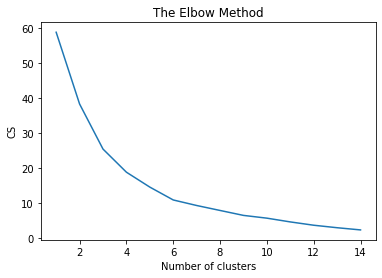

In [20]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

<font color='blue'>We can see that if K increases, average distortion will decrease.The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters. In the above plot we can see elbow point is 2. Next, I have checked checked with k= 3 and 6 for comparison purposes. k=2 gives maximum accuracy as expected.</font>

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 8 out of 25 samples were correctly labeled.
Accuracy score: 0.32


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 9 out of 25 samples were correctly labeled.
Accuracy score: 0.36


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 11 out of 25 samples were correctly labeled.
Accuracy score: 0.44


<font color='blue'>Plotting 2 clusters for visualization.</font>

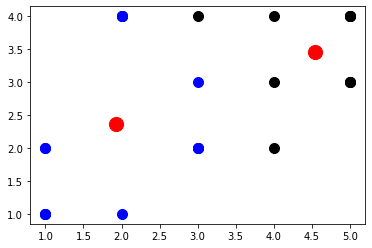

In [26]:
X = np.array(df1.loc[:,['Buy Made in India',                # Choose your variable names
                       'Family income']])    \
                        .reshape(-1, 2)

kmeans = KMeans(n_clusters = 2,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

#pred_y = kmeans.fit_predict(X)
y_kmeans = kmeans.fit_predict(X)

# Plot the data
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100,c='black',label='1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='2')
# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

<font color ='blue'>Next I have done labelling of clusters for K means clustering.</font>

In [27]:
kclusters=KMeans(n_clusters=2)
kclusters.fit_transform(df1)
clslabels=kclusters.labels_
clscenters=kclusters.cluster_centers_
print(clslabels)
print(clscenters)

[0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1]
[[3.5625     3.5625     3.4375     3.0625     3.375      3.375
  3.1875     1.3125     1.375      0.4375     1.9375     2.875
  2.375      1.5625     3.         2.625      1.3125    ]
 [2.         2.22222222 1.44444444 1.77777778 1.         1.22222222
  1.         4.77777778 4.33333333 0.55555556 2.22222222 2.77777778
  1.88888889 1.33333333 3.22222222 1.22222222 1.44444444]]


In [28]:
newclsdata=pd.concat([df1,pd.Series(clslabels)],axis=1)

In [29]:
newclsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Indian Technlogy high order      25 non-null     int64
 1   Buy Made in India                25 non-null     int64
 2   Value for money                  25 non-null     int64
 3   Convenience over style           25 non-null     int64
 4   Don't do waste full expenditure  25 non-null     int64
 5   No compromise on safety          25 non-null     int64
 6   Saver not spender                25 non-null     int64
 7   Try new things                   25 non-null     int64
 8   Be part of a changing world      25 non-null     int64
 9   Purchase Intentions              25 non-null     int64
 10  Occupation                       25 non-null     int64
 11  Family income                    25 non-null     int64
 12  Family size                      25 non-null     int

In [30]:
newclsdata.rename(columns = {0:'cluster_label'}, inplace = True)

In [31]:
newclsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Indian Technlogy high order      25 non-null     int64
 1   Buy Made in India                25 non-null     int64
 2   Value for money                  25 non-null     int64
 3   Convenience over style           25 non-null     int64
 4   Don't do waste full expenditure  25 non-null     int64
 5   No compromise on safety          25 non-null     int64
 6   Saver not spender                25 non-null     int64
 7   Try new things                   25 non-null     int64
 8   Be part of a changing world      25 non-null     int64
 9   Purchase Intentions              25 non-null     int64
 10  Occupation                       25 non-null     int64
 11  Family income                    25 non-null     int64
 12  Family size                      25 non-null     int

In [32]:
newclsdata=newclsdata.sort_values(by=['cluster_label'])
newclsdata


,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,cluster_label
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,0
14,3,2,5,5,5,5,4,2,1,0,2,1,3,2,3,3,2,0
13,5,5,2,2,2,3,1,1,1,1,2,3,2,1,3,2,1,0
23,4,5,3,2,3,3,4,1,1,0,1,4,3,1,3,2,1,0
11,5,4,3,2,3,2,2,2,2,0,1,2,3,2,3,3,3,0
18,4,5,3,3,3,2,2,1,1,1,2,3,2,1,3,3,1,0
9,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,0
15,4,5,2,2,3,1,1,1,1,1,2,3,2,1,3,3,1,0
8,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,0
21,2,1,5,5,5,5,4,1,1,0,2,2,3,2,3,2,3,0


In [33]:
#Counting number of data points in each cluster
newclsdata["cluster_label"].value_counts()

0    16
1     9
Name: cluster_label, dtype: int64

<h3><font color='blue'>The biggest disadvantage of K-Means is that it requires me to pre-specify the number of clusters (k). Also k-means is sensitive to outliers and different results can occur if I change the ordering of the data.</h3></font>
<br> <font color='blue'>Hierarchical clustering is an alternative approach that does not require a particular choice of clusters.Next I have explored Hierarchical clustering on the given dataset.</font>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [67.5, 67.5, 85.0, 85.0],
  [76.25, 76.25, 95.0, 95.0],
  [35.625, 35.625, 85.625, 85.625],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [117.5, 117.5, 135.0, 135.0],
  [126.25, 126.25, 145.0, 145.0],
  [135.625, 135.625, 155.0, 155.0],
  [60.625, 60.625, 145.3125, 145.3125],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [170.0, 170.0, 197.5, 197.5],
  [215.0, 215.0, 225.0, 225.0],
  [183.75, 183.75, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [201.875, 201.875, 240.0, 240.0],
  [102.96875, 102.96875, 220.9375, 220.9375]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [2.0, 2.6457513110645907, 2.6457513110645907, 0.0],
  [2.6457513110645907, 3.04155125386279, 3.04155125386279, 0.0],
  [3.04155125386279, 3.7953469506867505, 3.7953469506867505,

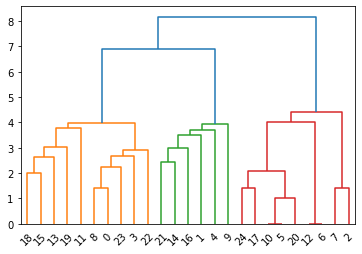

In [34]:
linked1 = linkage(df1, 'average','euclidean')
dendrogram(linked1, orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)   

In [35]:
#create 3 clusters using hierarchical clustering method
carclusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
car_cluster_label=carclusters.fit_predict(df1)
print(car_cluster_label)

[1 2 0 1 2 0 0 0 1 2 0 1 0 1 2 1 2 0 1 1 0 2 1 1 0]


In [36]:
#Create new dataset by merging cluster label with origional data
datawithclusters=pd.concat([df1,pd.Series(car_cluster_label)],axis=1)
datawithclusters.head(5)

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,0
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,1
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,0
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,1
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


In [37]:
datawithclusters.rename(columns = {0:'cluster_label'}, inplace = True)

In [38]:
datawithclusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Indian Technlogy high order      25 non-null     int64
 1   Buy Made in India                25 non-null     int64
 2   Value for money                  25 non-null     int64
 3   Convenience over style           25 non-null     int64
 4   Don't do waste full expenditure  25 non-null     int64
 5   No compromise on safety          25 non-null     int64
 6   Saver not spender                25 non-null     int64
 7   Try new things                   25 non-null     int64
 8   Be part of a changing world      25 non-null     int64
 9   Purchase Intentions              25 non-null     int64
 10  Occupation                       25 non-null     int64
 11  Family income                    25 non-null     int64
 12  Family size                      25 non-null     int

In [39]:
#hierarchical cluster doesn't retur cluster centre so do calculations using groupby function in python
#cluster centres are required for characterization of the cluster
car_data=datawithclusters.groupby(by='cluster_label')
car_data.mean()

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
cluster_label,,,,,,,,,,,,,,,,,
0,2.000000,2.222222,1.444444,1.777778,1.000000,1.222222,1.000000,4.777778,4.333333,0.555556,2.222222,2.777778,1.888889,1.333333,3.222222,1.222222,1.444444
1,4.400000,4.700000,2.700000,2.100000,2.800000,2.600000,2.600000,1.200000,1.400000,0.700000,1.800000,3.400000,2.400000,1.300000,3.000000,2.800000,1.200000
2,2.166667,1.666667,4.666667,4.666667,4.333333,4.666667,4.166667,1.500000,1.333333,0.000000,2.166667,2.000000,2.333333,2.000000,3.000000,2.333333,1.500000


In [40]:
#Count number of data points in each cluster
datawithclusters["cluster_label"].value_counts()

1    10
0     9
2     6
Name: cluster_label, dtype: int64

In [41]:
#Sort data by cluster to understand cluster characterisitcs
sorteddata=datawithclusters.sort_values(by=['cluster_label'])
sorteddata

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,cluster_label
12,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0
20,2,2,1,2,1,1,1,5,5,1,2,4,1,1,3,1,1,0
17,2,3,2,2,1,1,1,5,4,1,2,3,2,1,3,2,1,0
10,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
7,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,0
6,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0
24,2,3,2,2,1,1,1,5,4,1,2,4,2,1,3,1,1,0
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,0
5,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
15,4,5,2,2,3,1,1,1,1,1,2,3,2,1,3,3,1,1


<font color ='blue'>Inferences have been drawn based on Hierarchical clustering labels only.
</font><font color ='blue'><ol>For cluster 0, customer motivations for Indian Technlogy high order, Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender falls under disagreement range. The customers agree to try new things and be a part of changing world. Their age is within 21 to 40 and they have graduation or post graduation degrees </ol></font><font color ='blue'><ol>For cluster 1, customers are graduates within age range of 41 to 50. They agree on Indian Technlogy high order,Buy Made in India.They don't want to try new things nor do they prefer convenience over style.</ol></font><font color ='blue'><ol>For cluster 2, customers have positive view for Value for money,Convenience over style,Don't do wastefull expenditure,No compromise on safety,Saver not spender. They have no purchase intention. They are all unmarried, aged between 31 to 50 and work in private sector. Their motivations for Indian Technlogy high order, Buy Made in India are negative.</ol></font>

# Assignment 3- Association Rule Mining

<font color ='green'>Association rule mining is a technique to identify underlying relations between different items. In a Super Market where customers can buy variety of items. Usually, there is a pattern in what the customers buy.Transactions involve a pattern. More profit can be generated if the relationship between the items purchased in different transactions can be identified. </font>

In [62]:
store_data = pd.read_csv('E:\\SEM2\\1.SUBJECTS\\Data Mining\\assign\\Association_Rule_Mining_Data.csv')

In [63]:
store_data.head()

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6486475,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,6504964,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,6529569,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,6549521,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#find dimensions of data
store_data.shape

(50, 54)

<font color ='blue'>Removing row labels. I need only True and False value for Market Based Analysis using apriori method. All NaN values have been assumed to be False or 0.</font>

In [65]:
store_data=store_data.drop('Row Labels',axis=1)

In [66]:
store_data=store_data.fillna(0)

In [67]:
store_data.head()

,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#replace all 1 with True and 0 with False
store_data = store_data.applymap(lambda x: True if x == 1 else False)

<font color ='blue'>There are three major components of Apriori algorithm:
    <ol><b>Support</b> refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. </ol>
    <ol><b>Confidence</b> refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. </ol>
    <ol><b>Lift(A -> B)</b> refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B).</ol></font>
    

In [69]:
#find frequent itemsets in the data with specified support count using apriori algorithm
frequent_itemsets = apriori(store_data, min_support=0.1, use_colnames=True)
#if you don't set use_colnames=True, it returns column index instead of column name (item name)

In [70]:
#display frequent itemsets. 
frequent_itemsets

,support,itemsets
0,0.14,(Almonds)
1,0.72,(Banana)
2,0.48,(Beans)
3,0.40,(Boiled Rice)
4,0.14,(Bread)
...,...,...
1731,0.10,"(Sugar Cubes, Snacky Nuts, Root Vegetables, Banana, Sugar, Beans, Other Vegetables)"
1732,0.10,"(Raisins, Sugar Cubes, Snacky Nuts, Banana, Urad Dal, Sugar, Beans)"
1733,0.10,"(Sugar Cubes, Snacky Nuts, Root Vegetables, Banana, Urad Dal, Other Dals, Sugar)"
1734,0.10,"(Snacky Nuts, Root Vegetables, Urad Dal, Other Dals, Sugar, Beans, Other Vegetables)"


In [71]:
#find length of each itemset
frequent_itemsets["itemsets_length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

In [72]:
frequent_itemsets

,support,itemsets,itemsets_length
0,0.14,(Almonds),1
1,0.72,(Banana),1
2,0.48,(Beans),1
3,0.40,(Boiled Rice),1
4,0.14,(Bread),1
...,...,...,...
1731,0.10,"(Sugar Cubes, Snacky Nuts, Root Vegetables, Banana, Sugar, Beans, Other Vegetables)",7
1732,0.10,"(Raisins, Sugar Cubes, Snacky Nuts, Banana, Urad Dal, Sugar, Beans)",7
1733,0.10,"(Sugar Cubes, Snacky Nuts, Root Vegetables, Banana, Urad Dal, Other Dals, Sugar)",7
1734,0.10,"(Snacky Nuts, Root Vegetables, Urad Dal, Other Dals, Sugar, Beans, Other Vegetables)",7


In [73]:
#generate rules from frequent itemsets by specifying threshold for confidence or lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=.8)

In [74]:
#display rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Almonds),(Banana),0.14,0.72,0.12,0.857143,1.190476,0.0192,1.96
1,(Almonds),(Beans),0.14,0.48,0.12,0.857143,1.785714,0.0528,3.64
2,(Almonds),(Boiled Rice),0.14,0.40,0.14,1.000000,2.500000,0.0840,inf
3,(Almonds),(Other Dals),0.14,0.48,0.14,1.000000,2.083333,0.0728,inf
4,(Almonds),(Snacky Nuts),0.14,0.40,0.12,0.857143,2.142857,0.0640,4.20
...,...,...,...,...,...,...,...,...,...
6646,"(Snacky Nuts, Almonds)","(Boiled Rice, Other Rice Products, Root Vegetables, Banana, Other Dals, Beans)",0.12,0.14,0.10,0.833333,5.952381,0.0832,5.16
6647,"(Other Rice Products, Almonds)","(Boiled Rice, Snacky Nuts, Root Vegetables, Banana, Other Dals, Beans)",0.10,0.12,0.10,1.000000,8.333333,0.0880,inf
6648,"(Root Vegetables, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Banana, Other Dals, Beans)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf
6649,"(Banana, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Root Vegetables, Other Dals, Beans)",0.12,0.10,0.10,0.833333,8.333333,0.0880,5.40


In [75]:
#Create three columns specifying length of antecedent, consequents, and total length of the rule
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules["total_len"] = rules["antecedent_len"]+rules["consequents_len"]

<font color='blue'>The Apriori algorithm tries to extract rules for each possible combination of items.</font>

In [76]:
#now checking rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
0,(Almonds),(Banana),0.14,0.72,0.12,0.857143,1.190476,0.0192,1.96,1,1,2
1,(Almonds),(Beans),0.14,0.48,0.12,0.857143,1.785714,0.0528,3.64,1,1,2
2,(Almonds),(Boiled Rice),0.14,0.40,0.14,1.000000,2.500000,0.0840,inf,1,1,2
3,(Almonds),(Other Dals),0.14,0.48,0.14,1.000000,2.083333,0.0728,inf,1,1,2
4,(Almonds),(Snacky Nuts),0.14,0.40,0.12,0.857143,2.142857,0.0640,4.20,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6646,"(Snacky Nuts, Almonds)","(Boiled Rice, Other Rice Products, Root Vegetables, Banana, Other Dals, Beans)",0.12,0.14,0.10,0.833333,5.952381,0.0832,5.16,2,6,8
6647,"(Other Rice Products, Almonds)","(Boiled Rice, Snacky Nuts, Root Vegetables, Banana, Other Dals, Beans)",0.10,0.12,0.10,1.000000,8.333333,0.0880,inf,2,6,8
6648,"(Root Vegetables, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Banana, Other Dals, Beans)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf,2,6,8
6649,"(Banana, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Root Vegetables, Other Dals, Beans)",0.12,0.10,0.10,0.833333,8.333333,0.0880,5.40,2,6,8


<font color ='blue'>As we can see there are numerous rules prescribed by the unsupervised ML Algorithm, apriori. We need to set a minimum value for support and confidence. This means that rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence) have been considered.
All the subsets having higher value of support than minimum threshold have been extracted.
All the rules from the subsets with confidence value higher than minimum threshold of 0.95 are selected.
</font>

In [77]:
#Displaying rules that satisfies following condition
rules[ (rules['antecedent_len'] ==2) &
       (rules['confidence'] > 0.95) &
       (rules['consequents_len'] ==1)     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
28,"(Beans, Almonds)",(Banana),0.12,0.72,0.12,1.0,1.388889,0.0336,inf,2,1,3
29,"(Almonds, Banana)",(Beans),0.12,0.48,0.12,1.0,2.083333,0.0624,inf,2,1,3
32,"(Almonds, Banana)",(Boiled Rice),0.12,0.40,0.12,1.0,2.500000,0.0720,inf,2,1,3
34,"(Almonds, Banana)",(Other Dals),0.12,0.48,0.12,1.0,2.083333,0.0624,inf,2,1,3
38,"(Other Rice Products, Almonds)",(Banana),0.10,0.72,0.10,1.0,1.388889,0.0280,inf,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
335,"(Soya Products, Sugar)",(Urad Dal),0.10,0.36,0.10,1.0,2.777778,0.0640,inf,2,1,3
336,"(Urad Dal, Sugar Cubes)",(Sugar),0.20,0.50,0.20,1.0,2.000000,0.1000,inf,2,1,3
337,"(Whole Spices, Sugar Cubes)",(Sugar),0.10,0.50,0.10,1.0,2.000000,0.0500,inf,2,1,3
338,"(Toor Dal, Urad Dal)",(Sugar),0.14,0.50,0.14,1.0,2.000000,0.0700,inf,2,1,3


<font color='blue'>Following rules have been extracted based on lift value.</font>

<font color='blue'>Antecedent and Consequent have been shown for the lift value > 9 along with other parameters. I can now understand the kind  of food items that are being bought together.IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.<br><b>A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.</b></font>

In [89]:
rules[ (rules['lift'] >9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
4177,"(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)","(Root Vegetables, Almonds)",0.1,0.1,0.1,1.0,10.0,0.09,inf,4,2,6
4202,"(Root Vegetables, Almonds)","(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,4,6
5831,"(Boiled Rice, Snacky Nuts, Other Rice Products, Banana, Beans)","(Root Vegetables, Almonds)",0.1,0.1,0.1,1.0,10.0,0.09,inf,5,2,7
5848,"(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)","(Root Vegetables, Banana, Almonds)",0.1,0.1,0.1,1.0,10.0,0.09,inf,4,3,7
5884,"(Root Vegetables, Banana, Almonds)","(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,4,7
5889,"(Root Vegetables, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Banana, Beans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,5,7
6036,"(Boiled Rice, Snacky Nuts, Other Rice Products, Other Dals, Beans)","(Root Vegetables, Almonds)",0.1,0.1,0.1,1.0,10.0,0.09,inf,5,2,7
6053,"(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)","(Root Vegetables, Almonds, Other Dals)",0.1,0.1,0.1,1.0,10.0,0.09,inf,4,3,7
6088,"(Root Vegetables, Almonds, Other Dals)","(Snacky Nuts, Boiled Rice, Other Rice Products, Beans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,4,7
6093,"(Root Vegetables, Almonds)","(Boiled Rice, Snacky Nuts, Other Rice Products, Other Dals, Beans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,5,7


In [85]:
rules[ (rules['lift'] <1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len


<font color='blue'>Fortunately for the store manager as per above result it is <b> not unlikely</b> to make association of all items in store.</font>

In [87]:
rules[ (rules['lift'] ==1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len


<font color='blue'>Fortunately for the store manager as per above result all items in store are associated. <b> No new associations </b> are needed to be made as there are no items which are not associated as per customer buying behaviour.</font>